<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 6</center></h3>
<h4><center>K-Means and PCA<center></h4>


<font color='red'>
Ido Aharon
</font>


**Instructions:**
- Download the notebook with **"File"** -> **"Download .ipynb"**
- Drag the notebook to your Google Drive

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm.<br>
**The implementation will be based on the [NumPy](https://numpy.org/) package only.**

### **1. Useful packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [2]:
## Generate 2D data 
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

<ipython-input-3-5d2f93b9a0ca>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


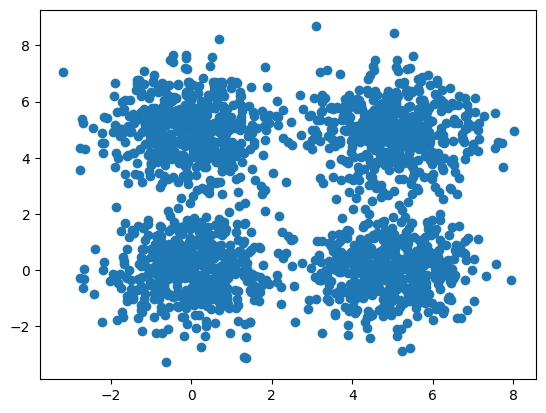

In [3]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [4]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X. 
                                # This can be useful for the next tasks.
        
        self.labels_ = None     # Here you should store the final labels. 
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.
        
        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        # Store the dataset
        self.X_fit_ = X
        
        # Initialize the centroids randomly
        self.centroids = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        
        # Iterate until convergence or maximum number of iterations is reached
        for i in range(self.max_iter):
            # Get the labels for the current centroids
            labels = self._get_labels(X)
            
            # Calculate the new centroids
            centroids = self._get_centroids(X, labels)
            
            # Calculate the cost for this iteration
            cost = self._calculate_cost(X)
            
            # Check if the centroids have changed or if the maximum number of iterations has been reached
            if np.array_equal(self.centroids, centroids) or i == self.max_iter - 1:
                # Store the final labels and centroids
                self.labels_ = labels
                self.centroids = centroids
                # Calculate the final cost
                self.costs.append(self._calculate_cost(X))
                break
            else:
                # Store the labels and centroids for this iteration
                self.labels_history.append(labels)
                self.centroids_history.append(centroids)
                self.costs.append(cost)
                # Update the centroids for the next iteration
                self.centroids = centroids

    def predict(self, X):
        #print("The input X in predict is: " + str(X))
        # Calculate the distances between each point and the centroids
        distances = self._get_distances(X)
        #print("The distances in predict are: " + str(distances))
        # Get the index of the centroid with the minimum distance for each point
        ind = np.argmin(distances, axis=1)
        #print("The return value in predict is: " + str(ind))
        return ind

    def _get_distances(self, X):
        # Calculate the distance between each point and each centroid
        dist = np.sqrt(np.sum((X[:, np.newaxis] - self.centroids) ** 2, axis=2))
        # Here, each row i corresponds to the i-th point in X, and each column j corresponds to the j-th centroid.
        # The element (i, j) contains the Euclidean distance between the i-th point and the j-th centroid.
        # print("The return value in get distances is: " + str(dist))
        return dist
    
    def _get_labels(self, X):
        # Calculate the distances between each point and the centroids
        distances = self._get_distances(X)
        # Get the index of the centroid with the minimum distance for each point
        lbl = np.argmin(distances, axis=1)
        #print("The return value in get labels is :" + str(lbl))
        return lbl

    def _get_centroids(self, X, labels):
        # Calculate the new centroids as the mean of the points in each cluster
        cent = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        #print("The return value in get centroids is: " + str(cent))
        return cent
    
    def _calculate_cost(self, X):
        # Calculate the distances between each point and the centroids
        distances = self._get_distances(X)
        # Get the minimum distance for each point and sum them
        cst = np.sum(np.min(distances, axis=1))
        #print("The return value in calculate cost is: " + str(cst))
        return cst




Run the algorithm on the 2D dataset

In [5]:
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

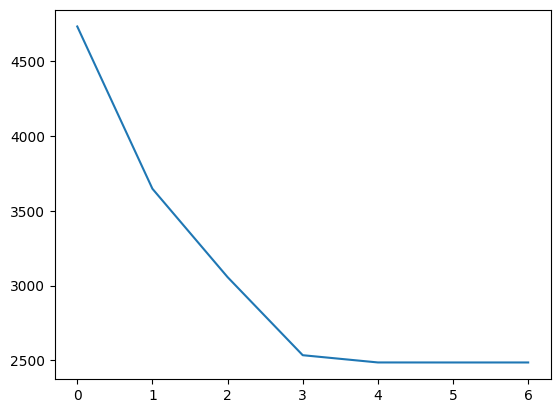

In [6]:
costs = kmeans.costs
plt.plot(costs)
# print(costs[-1])

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 5377.303548718342 <br>
3 clusters: 3916.8966397704303 <br>
4 clusters: 2472.856297416197 <br>
6 clusters: 2249.101612636363 <br>
8 clusters: 2001.5405967236052 <br>
10 clusters: 1891.1522847918473 <br>
20 clusters: 1348.6634068022304 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

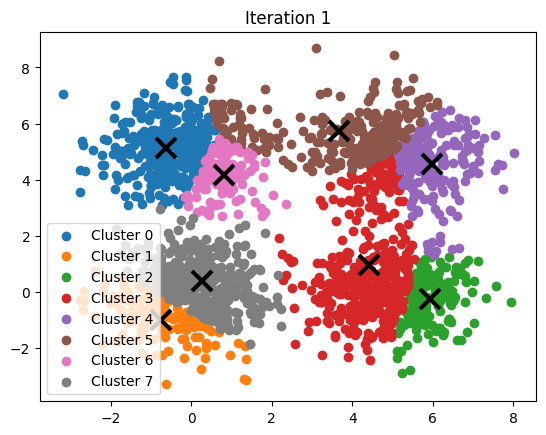

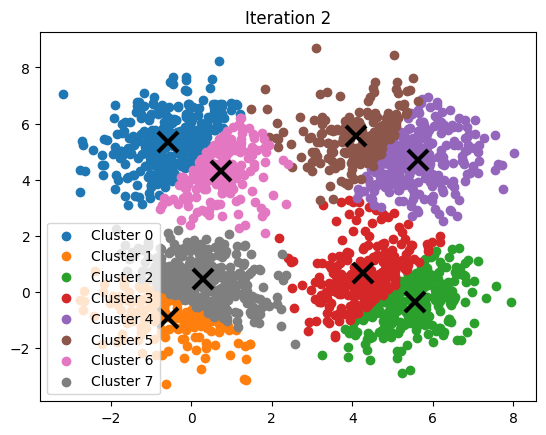

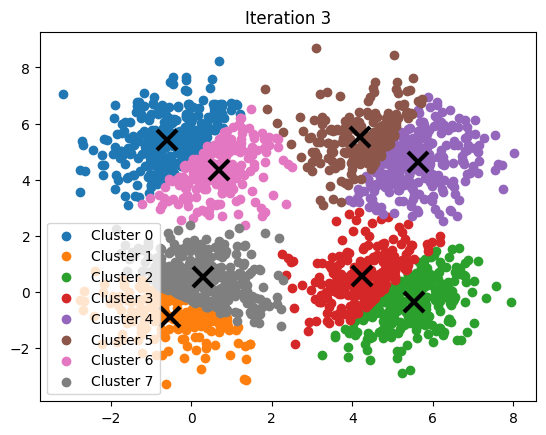

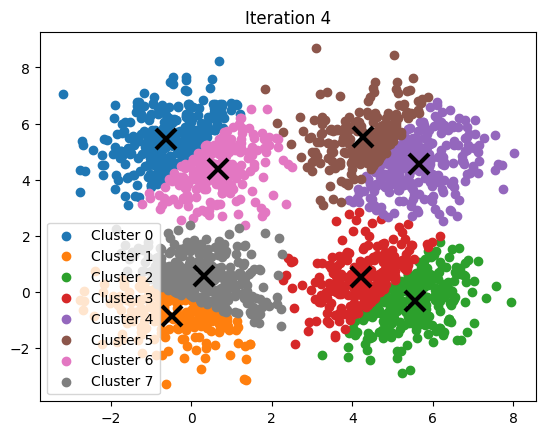

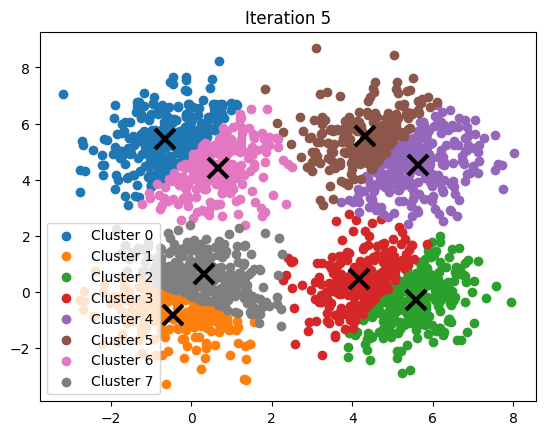

In [7]:
def iterative_plot(km, X, n_iter):
    # Loop through the first n_iter iterations
    for i in range(n_iter):
        # Get the labels and centroids for the current iteration
        labels = km.labels_history[i]
        centroids = km.centroids_history[i]
        
        # Create a new figure for each iteration
        fig, ax = plt.subplots()
        
        # Plot the points in each cluster
        for j in range(km.n_clusters):
            ax.scatter(X[labels == j, 0], X[labels == j, 1], label=f'Cluster {j}')
            
        # Plot the centroids
        ax.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15, markeredgewidth=3)
        
        # Add a title and legend
        ax.set_title(f'Iteration {i + 1}')
        ax.legend()

        # Show the plot
        plt.show()

km = KMeans(n_clusters=8)
km.fit(X)
iterative_plot(km, X, n_iter=5)

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [ ]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        # center the data
        X = X - np.mean(X, axis=0)
        
        # calculate the covariance matrix
        cov_matrix = np.cov(X, rowvar=False)
        
        # calculate the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # sort the eigenvectors based on their corresponding eigenvalues
        eigenvectors = eigenvectors[:, np.argsort(eigenvalues)[::-1]]
        
        self.V = eigenvectors
        return self.V
    
    def transform(self, X, n_dimensions):
        # center the data
        X = X - np.mean(X, axis=0)
        
        # use the eigenvectors stored in self.V to transform the data
        X_reduced = np.dot(X, self.V[:, :n_dimensions])
        
        return X_reduced



Run the algorithm on MNIST dataset.

In [ ]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2).T

Plot the data in the top 2 principal component space.

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


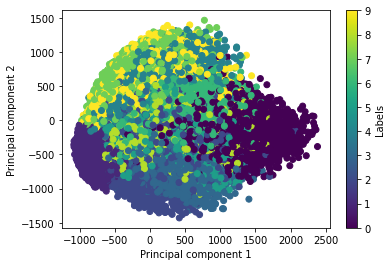

In [ ]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[0], X_reduced[1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

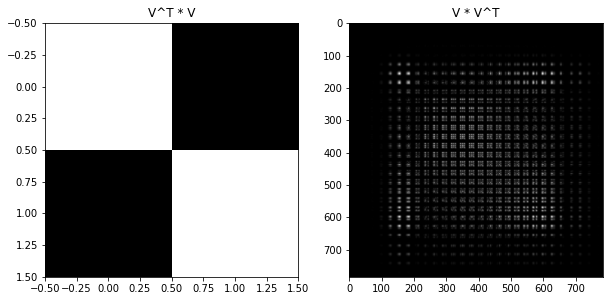

In [ ]:
V = pca.V [:, :2]
VTV = np.abs(np.dot(V.T, V))
VVT = np.abs(np.dot(V, V.T))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(VTV, cmap='gray')
ax1.set_title('V^T * V')
ax2.imshow(VVT, cmap='gray')
ax2.set_title('V * V^T')
plt.show()

<font color='red'>
Explanation:
</font>

First, the matrices differ in size: $V \in R^{784x2} \rightarrow V^T V \in R^{2x2}$ and $VV^T \in R^{784x784}$

The matrix $V^T \in R^{2x784}$ is used to encode the samples from $R^{784}$ to $R^2$, and the matrix $V \in R^{784x2}$ is used to decode the samples representation from $R^2$ to $R^{784}$. 

$VV^T$ is a matrix that first encodes the samples to the lower dimension 2, then decodes the samples again to the higher dimension 784. 

$V^TV$ is a matrix that first decodes the samples to $R^{784}$ and then encodes it back to $R^2$.


Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimentions):
    # project the sample to the n-dimensional space
    x_projected = np.dot(x - np.mean(x, axis=0), pca.V[:, :n_dimentions])
    
    # reconstruct the sample to the original space
    x_reconstructed = np.dot(x_projected, pca.V[:, :n_dimentions].T) + np.mean(x, axis=0)
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>
<font color='red'>
Answer: 
</font> 

The reconstructed images are not very similar when the transfer dimension is too low (depends on the random number chosen), but in dimension 100 the picture looks pretty similar to the original picture.
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


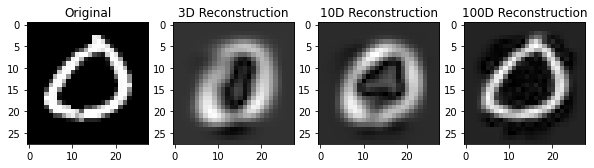

In [ ]:
# sample a random image from the dataset
random_index = np.random.randint(0, X.shape[0])
x_original = X[random_index]

# project the image to 3-dimensional space and reconstruct it
x_reconstructed_3d = np.abs(pca_reconstruction(x_original, 3))

# project the image to 10-dimensional space and reconstruct it
x_reconstructed_10d = np.abs(pca_reconstruction(x_original, 10))

# project the image to 100-dimensional space and reconstruct it
x_reconstructed_100d = np.abs(pca_reconstruction(x_original, 100))

# plot the original image, and the reconstructed images
fig, axs = plt.subplots(1, 4, figsize=(10, 10))
axs[0].imshow(x_original.reshape(28, 28), cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(x_reconstructed_3d.reshape(28, 28), cmap='gray')
axs[1].set_title('3D Reconstruction')
axs[2].imshow(x_reconstructed_10d.reshape(28, 28), cmap='gray')
axs[2].set_title('10D Reconstruction')
axs[3].imshow(x_reconstructed_100d.reshape(28, 28), cmap='gray')
axs[3].set_title('100D Reconstruction')
plt.show()
